In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


I created a correlation heatmap to show how different variables related to each other regarding credit data.

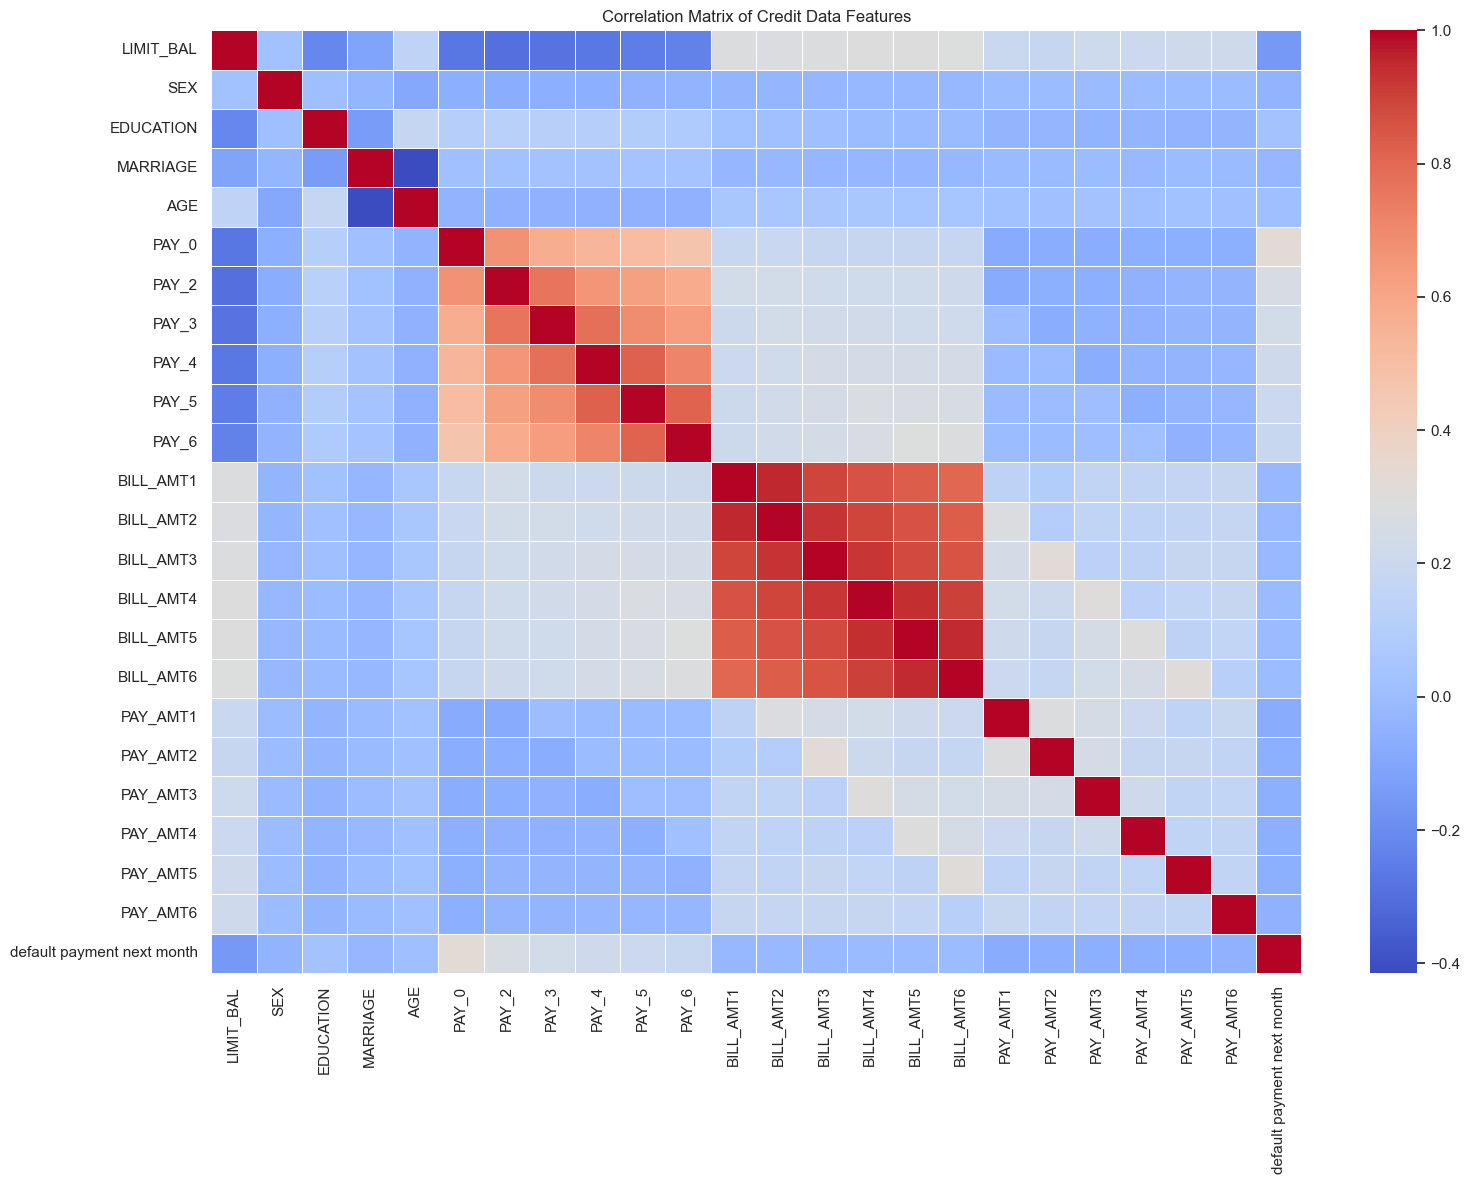

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Datasets/Credit.csv')


df = df.apply(pd.to_numeric, errors='coerce')

correlation_matrix = df.drop(columns=["ID"]).corr()

sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Credit Data Features")
plt.tight_layout()
plt.show()




I created a boxplot of credit limits by default status. I created a bar plot that shows the average default rate by sex. I also created a boxplot of age by default status. I used descriptive visualizations to examine how credit defaults vary by credit limit, gender, and age.

Data shape: (30000, 25)
Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
Sample data:
    LIMIT_BAL  SEX  AGE  default payment next month
0      20000    2   24                           1
1     120000    2   26                           1
2      90000    2   34                           0
3      50000    2   37                           0
4      50000    1   57                           0


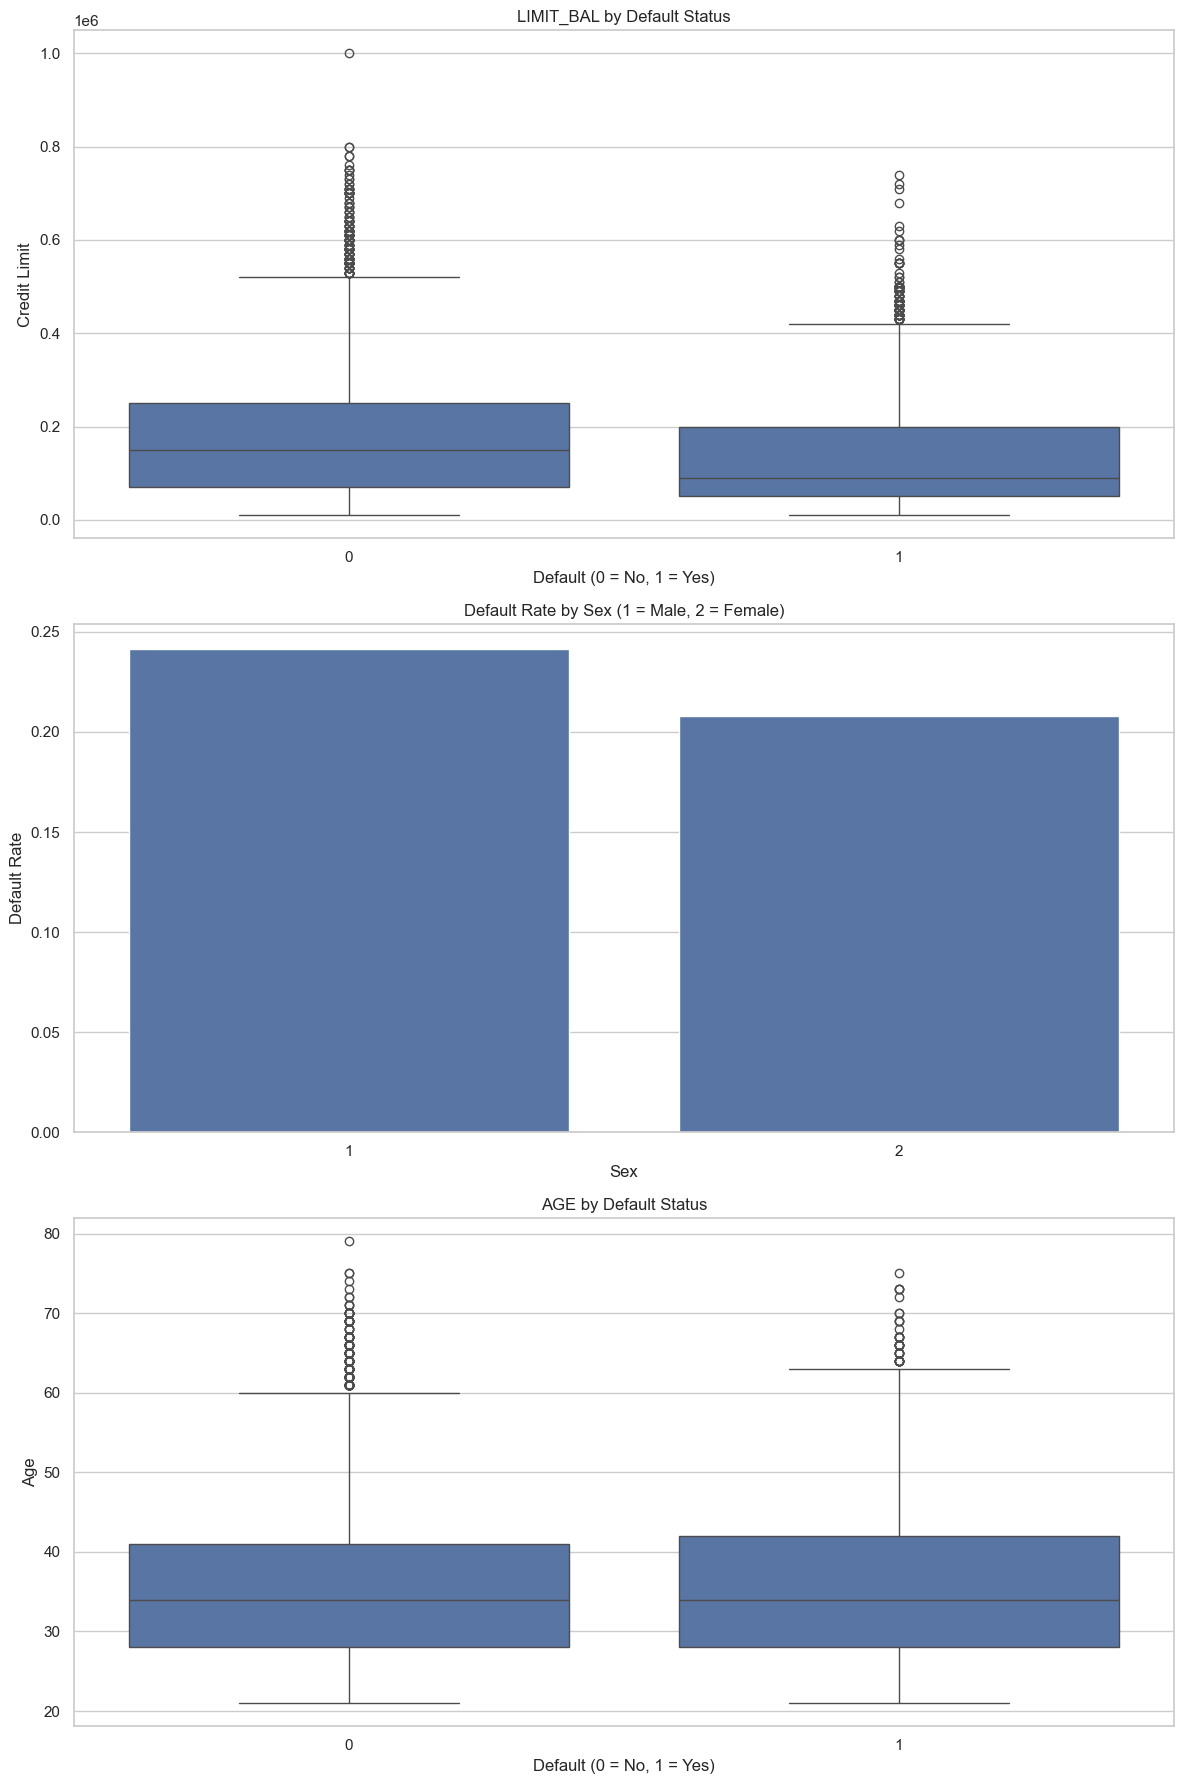

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Datasets/Credit.csv')

df = df.apply(pd.to_numeric, errors='coerce')

print("Data shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Sample data:\n", df[["LIMIT_BAL", "SEX", "AGE", "default payment next month"]].head())

sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.boxplot(x="default payment next month", y="LIMIT_BAL", data=df, ax=axs[0])
axs[0].set_title("LIMIT_BAL by Default Status")
axs[0].set_xlabel("Default (0 = No, 1 = Yes)")
axs[0].set_ylabel("Credit Limit")

sex_default_rate = df.groupby("SEX")["default payment next month"].mean().reset_index()
sns.barplot(x="SEX", y="default payment next month", data=sex_default_rate, ax=axs[1])
axs[1].set_title("Default Rate by Sex (1 = Male, 2 = Female)")
axs[1].set_xlabel("Sex")
axs[1].set_ylabel("Default Rate")

sns.boxplot(x="default payment next month", y="AGE", data=df, ax=axs[2])
axs[2].set_title("AGE by Default Status")
axs[2].set_xlabel("Default (0 = No, 1 = Yes)")
axs[2].set_ylabel("Age")

plt.tight_layout()
plt.show()


This is a bar chart of Default Rate by Education that shows how a categorical variable can relate to a binary outcome. This is how descriptive statistics helps us understand behavior in relation to financial data and how lenders judge people on giving loans.

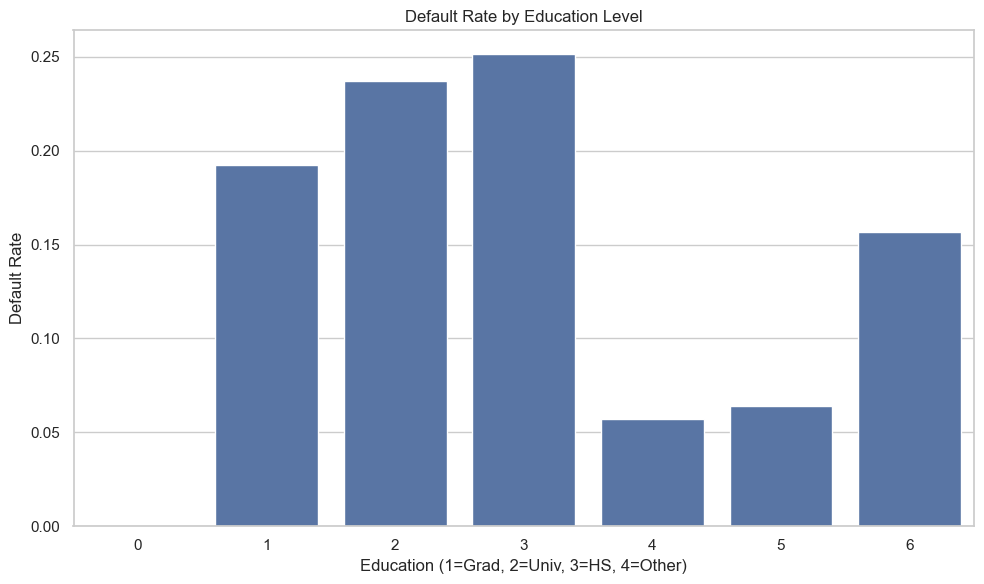

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Datasets/Credit.csv')


df = df.apply(pd.to_numeric, errors='coerce')

edu_default = df.groupby("EDUCATION")["default payment next month"].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="EDUCATION", y="default payment next month", data=edu_default)
plt.title("Default Rate by Education Level")
plt.xlabel("Education (1=Grad, 2=Univ, 3=HS, 4=Other)")
plt.ylabel("Default Rate")
plt.tight_layout()
plt.show()



I used descriptive statistics to understand the variables. For age and limit_bal I calculated the mean, median, mode, standard deviation, and variance. The histogram with KDE shows the distribution of ages is right skewed. The boxplot compared credit limits for people who defaulted. The scatterplot with regression shows age vs credit limit by default using a regression line. The contingency heatmap shows the proportion of defaults within each education group and shows how the conditional probability varies by group. The histogram shows the distribution of September's bill amounts is right skewed. Bayes' Theorem shows the probability that someone will default given their education level is 2 (University)


📊 Summary Statistics:

Mean AGE: 35.4855
Median AGE: 34.0
Mode AGE: 29
AGE Std Dev: 9.217904068090188
AGE Variance: 84.96975540851363

Mean LIMIT_BAL: 167484.32266666667
Median LIMIT_BAL: 140000.0
Mode LIMIT_BAL: 50000
LIMIT_BAL Std Dev: 129747.66156720239
LIMIT_BAL Variance: 16834455682.15729


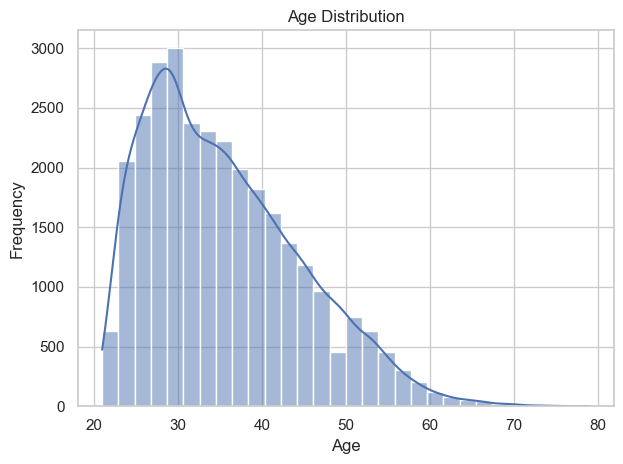

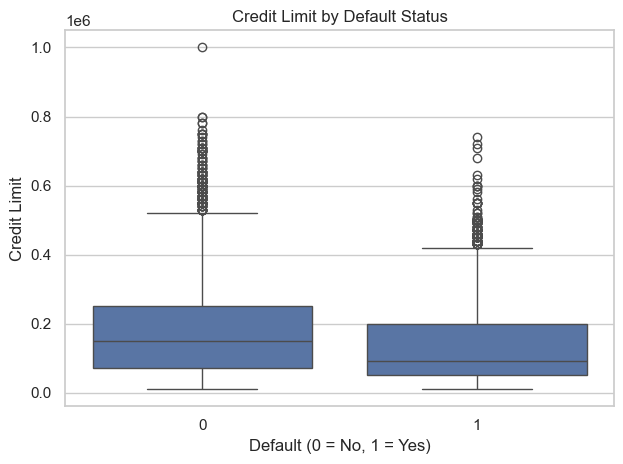

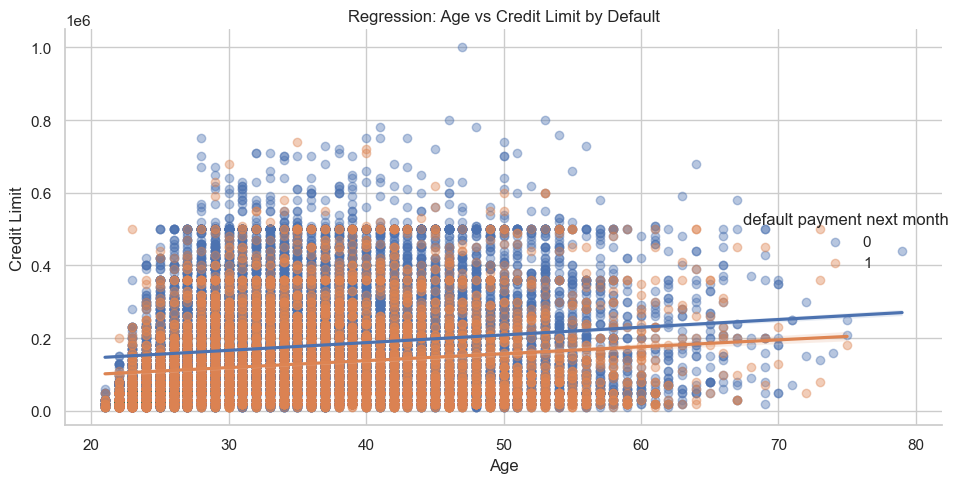

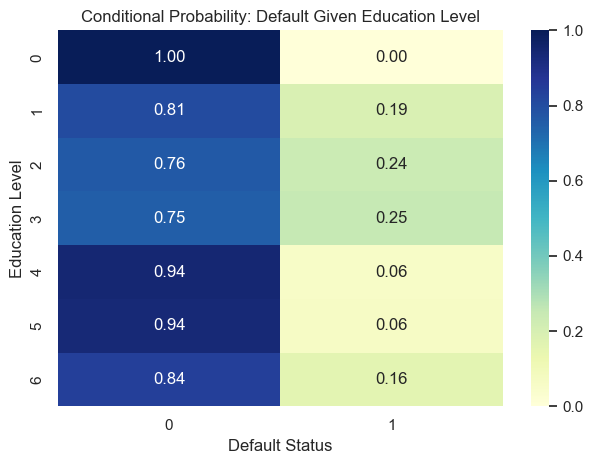

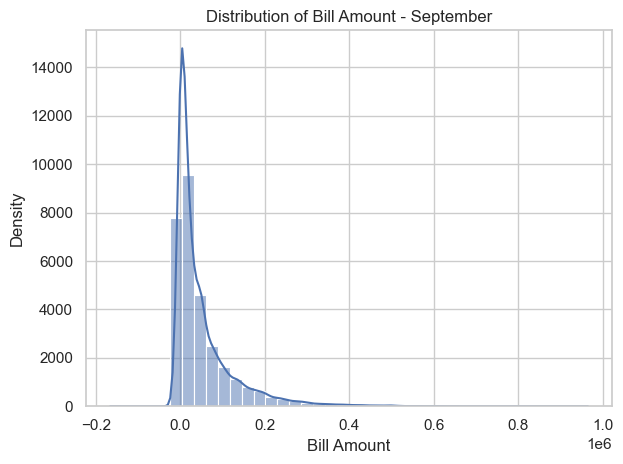


📐 Bayes Theorem Estimate:
P(Default = 1 | Education = 2) ≈ 0.2373


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('Datasets/Credit.csv')

df = df.apply(pd.to_numeric, errors='coerce')

print("\n📊 Summary Statistics:\n")
print("Mean AGE:", df["AGE"].mean())
print("Median AGE:", df["AGE"].median())
print("Mode AGE:", df["AGE"].mode().iloc[0])
print("AGE Std Dev:", df["AGE"].std())
print("AGE Variance:", df["AGE"].var())

print("\nMean LIMIT_BAL:", df["LIMIT_BAL"].mean())
print("Median LIMIT_BAL:", df["LIMIT_BAL"].median())
print("Mode LIMIT_BAL:", df["LIMIT_BAL"].mode().iloc[0])
print("LIMIT_BAL Std Dev:", df["LIMIT_BAL"].std())
print("LIMIT_BAL Variance:", df["LIMIT_BAL"].var())

sns.histplot(df["AGE"], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

sns.boxplot(x="default payment next month", y="LIMIT_BAL", data=df)
plt.title("Credit Limit by Default Status")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Limit")
plt.tight_layout()
plt.show()

sns.lmplot(x="AGE", y="LIMIT_BAL", hue="default payment next month", data=df, aspect=1.5, scatter_kws={"alpha": 0.4})
plt.title("Regression: Age vs Credit Limit by Default")
plt.xlabel("Age")
plt.ylabel("Credit Limit")
plt.tight_layout()
plt.show()

ct = pd.crosstab(df["EDUCATION"], df["default payment next month"], normalize='index')
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Conditional Probability: Default Given Education Level")
plt.xlabel("Default Status")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()

sns.histplot(df["BILL_AMT1"], kde=True, bins=40)
plt.title("Distribution of Bill Amount - September")
plt.xlabel("Bill Amount")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

p_default = df["default payment next month"].mean()
p_edu_2 = (df["EDUCATION"] == 2).mean()
p_edu2_given_default = len(df[(df["EDUCATION"] == 2) & (df["default payment next month"] == 1)]) / len(df[df["default payment next month"] == 1])
p_default_given_edu2 = (p_edu2_given_default * p_default) / p_edu_2

print("\n📐 Bayes Theorem Estimate:")
print("P(Default = 1 | Education = 2) ≈", round(p_default_given_edu2, 4))


Binomial model for defaulting was appropriate assuming each client to default was independent. 22% means about 2 out of 3 people will default. Poisson Distribution shows an average rate of 1.5 missed payments per month. This distribution was ideal for the data count. The histogram to demonstrate The Central Limit Theorem formed a normal bell shaped curve as predicted. The Confidence Interval dataset shows a default rate around 22% that means we're 95% confident that the true population default rate falls within this range. 

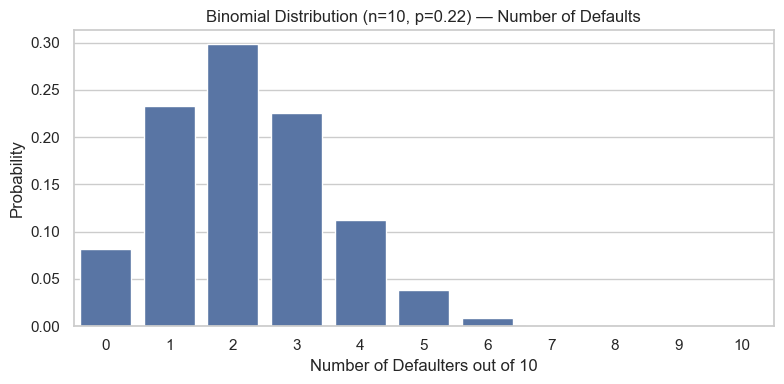

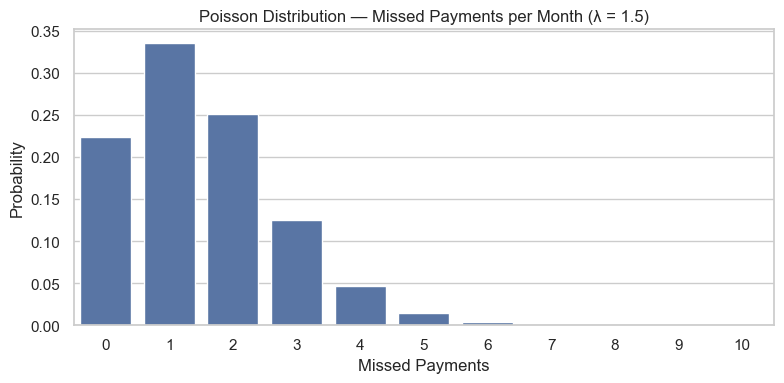

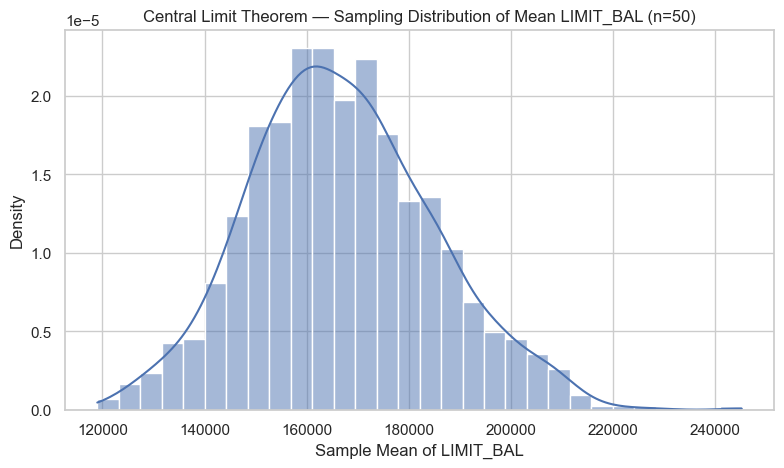


✅ 95% Confidence Interval for Default Rate:
Mean Default Rate: 0.2212
CI: (0.2165, 0.2259)


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, poisson, norm

df = pd.read_csv('Datasets/Credit.csv')

df = df.apply(pd.to_numeric, errors='coerce')

n = 10  
p = df["default payment next month"].mean()  
k = np.arange(0, n + 1)
binom_probs = binom.pmf(k, n, p)

plt.figure(figsize=(8, 4))
sns.barplot(x=k, y=binom_probs)
plt.title(f"Binomial Distribution (n={n}, p={p:.2f}) — Number of Defaults")
plt.xlabel("Number of Defaulters out of 10")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

lambda_poisson = 1.5  
x = np.arange(0, 11)
poisson_probs = poisson.pmf(x, lambda_poisson)

plt.figure(figsize=(8, 4))
sns.barplot(x=x, y=poisson_probs)
plt.title("Poisson Distribution — Missed Payments per Month (λ = 1.5)")
plt.xlabel("Missed Payments")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

sample_means = []
for _ in range(1000):
    sample = df["LIMIT_BAL"].dropna().sample(50)
    sample_means.append(sample.mean())

plt.figure(figsize=(8, 5))
sns.histplot(sample_means, kde=True, bins=30, stat="density")
plt.title("Central Limit Theorem — Sampling Distribution of Mean LIMIT_BAL (n=50)")
plt.xlabel("Sample Mean of LIMIT_BAL")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

p_hat = df["default payment next month"].mean()
n = len(df)
se = np.sqrt((p_hat * (1 - p_hat)) / n)
z = norm.ppf(0.975)
ci_low, ci_high = p_hat - z * se, p_hat + z * se

print(f"\n✅ 95% Confidence Interval for Default Rate:")
print(f"Mean Default Rate: {p_hat:.4f}")
print(f"CI: ({ci_low:.4f}, {ci_high:.4f})")


Binary classification problem built on real data of a logistic regression model. The dataset is imbalanced because most people don't default and accuracy was around 77%. The confusion matrix shows the model struggled to catch defaulters since it mostly predicted no default. AUC was not strong enough for real world use since it was around 0.65.

✅ Logistic Regression Model Results

Accuracy: 0.8047

Confusion Matrix:
[[4538  149]
 [1023  290]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.66      0.22      0.33      1313

    accuracy                           0.80      6000
   macro avg       0.74      0.59      0.61      6000
weighted avg       0.78      0.80      0.76      6000



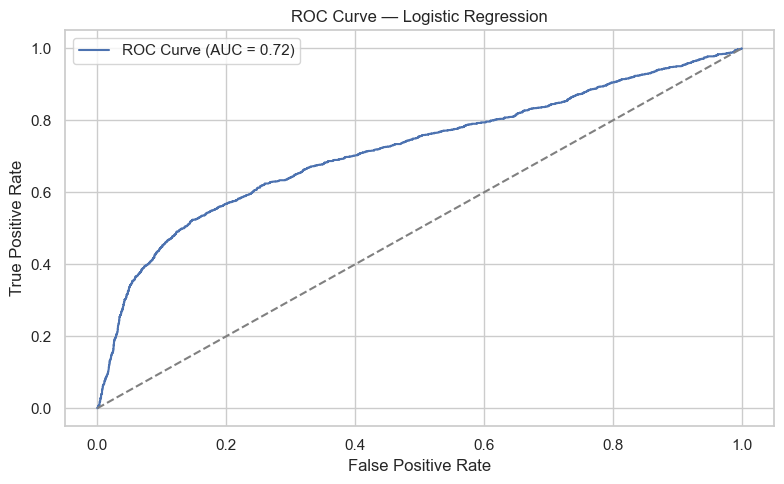

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

df = pd.read_csv('Datasets/Credit.csv')

df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

features = ["LIMIT_BAL", "AGE", "SEX", "EDUCATION", "MARRIAGE", "PAY_0"]
X = df[features]
y = df["default payment next month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("✅ Logistic Regression Model Results\n")
print("Accuracy:", round(accuracy, 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()


The correlation heatmap shows that variables like PAY_0 through PAY_6 (payment history) are moderately positively correlated with the default variable. This suggests that customers with delayed or missed payments in the past are more likely to default in the future. The ROC curve shows it's better than random but has room for improvment.

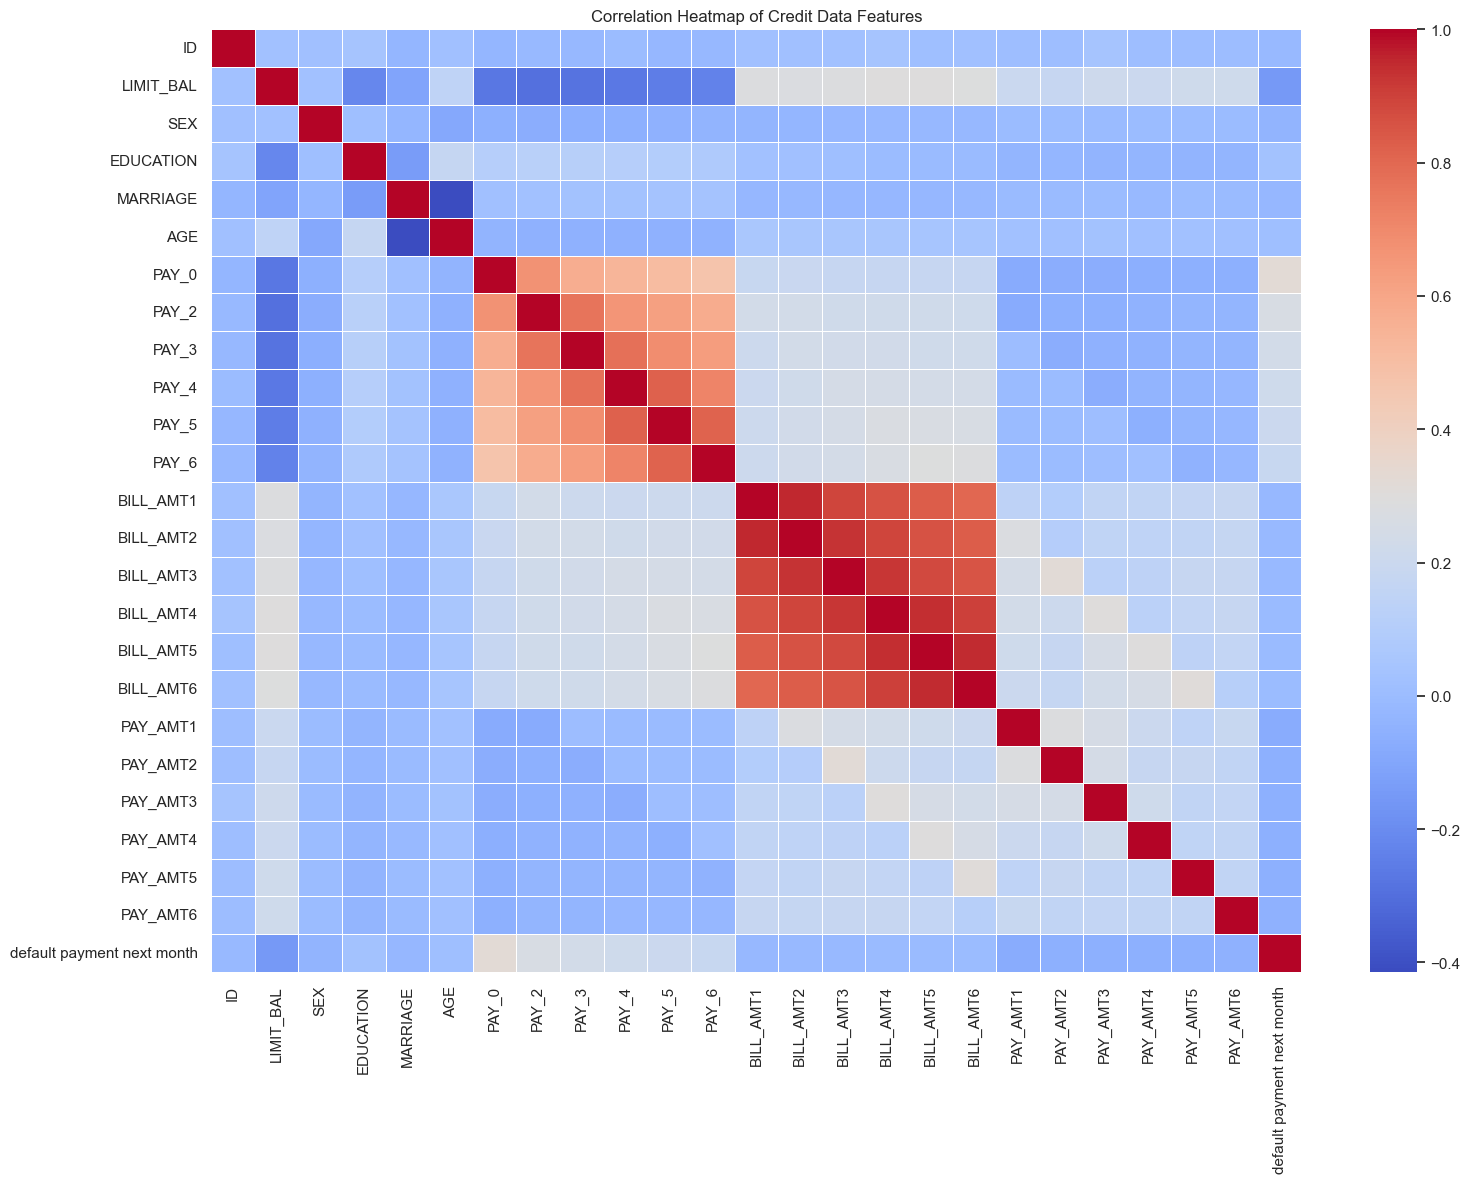

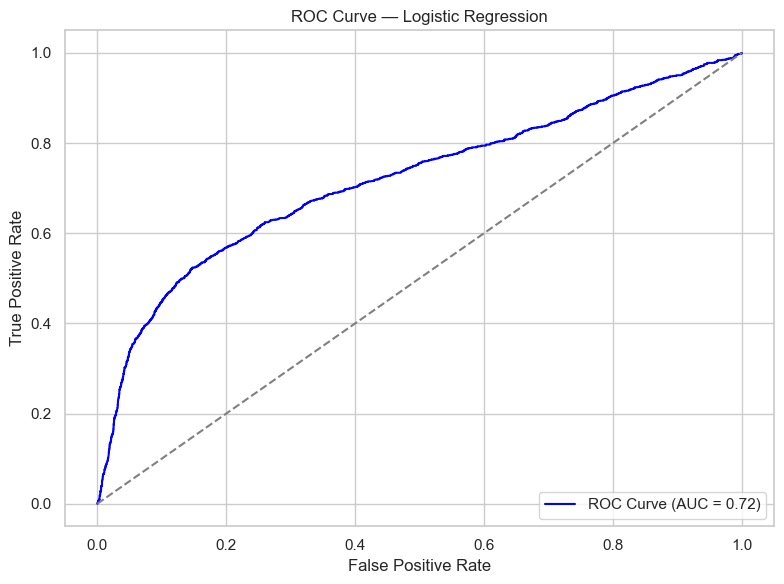

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('Datasets/Credit.csv')

df = df.apply(pd.to_numeric, errors='coerce').dropna()

plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Credit Data Features")
plt.tight_layout()
plt.show()

features = ["LIMIT_BAL", "AGE", "SEX", "EDUCATION", "MARRIAGE", "PAY_0"]
X = df[features]
y = df["default payment next month"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
